<a href="https://colab.research.google.com/github/BNLCSISMR/Smoking-Obesity-Project/blob/main/MLP_SmokingTumorProject.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install GEOparse



Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [2]:
import GEOparse
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
%matplotlib inline



gse = GEOparse.get_GEO(geo="GSE46699", destdir="./")


07-Nov-2022 09:26:13 DEBUG utils - Directory ./ already exists. Skipping.
DEBUG:GEOparse:Directory ./ already exists. Skipping.
07-Nov-2022 09:26:13 INFO GEOparse - File already exist: using local version.
INFO:GEOparse:File already exist: using local version.
07-Nov-2022 09:26:13 INFO GEOparse - Parsing ./GSE46699_family.soft.gz: 
INFO:GEOparse:Parsing ./GSE46699_family.soft.gz: 
07-Nov-2022 09:26:13 DEBUG GEOparse - DATABASE: GeoMiame
DEBUG:GEOparse:DATABASE: GeoMiame
07-Nov-2022 09:26:13 DEBUG GEOparse - SERIES: GSE46699
DEBUG:GEOparse:SERIES: GSE46699
07-Nov-2022 09:26:13 DEBUG GEOparse - PLATFORM: GPL570
DEBUG:GEOparse:PLATFORM: GPL570
/usr/local/lib/python3.7/dist-packages/GEOparse/GEOparse.py:545: DtypeWarning: Columns (2) have mixed types.Specify dtype option on import or set low_memory=False.
  table_data = parse_table_data(gpl_soft)
07-Nov-2022 09:26:14 DEBUG GEOparse - SAMPLE: GSM1134764
DEBUG:GEOparse:SAMPLE: GSM1134764
07-Nov-2022 09:26:14 DEBUG GEOparse - SAMPLE: GSM11347

In [3]:
import pandas as pd
import torch


In [4]:

print()
print("GSM example:")

for gsm_name, gsm in gse.gsms.items():
    print("Name: ", gsm_name)
    print("Metadata:",)
    for key, value in gsm.metadata.items():
        if(key == 'characteristics_ch1'):
         print(value[1])
         print(value[2])
         print(value[3])
    #print ("Table data:",)
    #print (gsm.table.head())
    

print()

#print("GPL example:")
#for gpl_name, gpl in gse.gpls.items():
 #   print("Name: ", gpl_name)
  #  print("Metadata:",)
   # for key, value in gpl.metadata.items():
    #    print(" - %s : %s" % (key, ", ".join(value)))
    #print("Table data:",)
    #print(gpl.table.head())
    #break


GSM example:
Name:  GSM1134764
Metadata:
tissue: normal
smoking: no
obese: no
Name:  GSM1134765
Metadata:
tissue: tumor
smoking: no
obese: no
Name:  GSM1134766
Metadata:
tissue: normal
smoking: yes
obese: no
Name:  GSM1134767
Metadata:
tissue: tumor
smoking: yes
obese: no
Name:  GSM1134768
Metadata:
tissue: normal
smoking: no
obese: no
Name:  GSM1134769
Metadata:
tissue: tumor
smoking: no
obese: no
Name:  GSM1134770
Metadata:
tissue: normal
smoking: no
obese: no
Name:  GSM1134771
Metadata:
tissue: tumor
smoking: no
obese: no
Name:  GSM1134772
Metadata:
tissue: normal
smoking: yes
obese: no
Name:  GSM1134773
Metadata:
tissue: tumor
smoking: yes
obese: no
Name:  GSM1134774
Metadata:
tissue: normal
smoking: no
obese: no
Name:  GSM1134775
Metadata:
tissue: tumor
smoking: no
obese: no
Name:  GSM1134776
Metadata:
tissue: normal
smoking: yes
obese: no
Name:  GSM1134777
Metadata:
tissue: tumor
smoking: yes
obese: no
Name:  GSM1134778
Metadata:
tissue: normal
smoking: yes
obese: yes
Name:  GSM

Printing the name, head, and items

Create a merged table of the first gsm table we have. Print the head and test out accessing one column

In [5]:
mergedTable = gsm.table
entry = mergedTable["VALUE"]

Iterate through all of the tables and add the values column to the end of the mergedTable

In [6]:
for gsm_name, gsm in gse.gsms.items():
    entry = gsm.table["VALUE"]
    mergedTable.insert(1, gsm_name, value=entry, allow_duplicates=True)
    ##mergedTable = mergedTable.assign(gsm_name = entry)

    ##gsm.table = pd.merge(mergedTable, gsm.table, how = 'inner')

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:3249: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  if (await self.run_code(code, result,  async_=asy)):


Print mergedTable

drop the last column as it is a duplicate

In [7]:
mergedTable = mergedTable.iloc[: , :-1]

Transpose the table to make ID_REF the index

In [8]:
newMergeTable = mergedTable.transpose()

In [9]:
newMergeTable = newMergeTable.rename(columns=newMergeTable.iloc[0])
newMergeTable = newMergeTable.iloc[1: , :]

In [10]:
tissueList = []
tissue_label = []
smokingList = []
smoking_label = []
obesityList = []
obesity_label = []
for gsm_name, gsm in gse.gsms.items():
    for key, value in gsm.metadata.items():
        if(key == 'characteristics_ch1'):
         substringOne = 'tumor'
         substringTwo = 'yes'
         substringThree = 'yes'
         
         ##Appending all the values to tissue list if its a tumor or not (tumor = 1 normal = 0)
         if substringOne in value[1]:
           tissueList.append(1)
           tissue_label.append('tumor')
         else:
           tissueList.append(0)
           tissue_label.append('normal')
         
         ##Appending all teh values to the smoking list(smoker=1 non-smoker = 0)
         if substringTwo in value[2]:
           smokingList.append(1)
           smoking_label.append('yes')
         else:
           smokingList.append(0)
           smoking_label.append('no')

        ##Appending all teh values to the obesity list(obese = 1 not obese = 0)
         if substringThree in value[3]:
           obesityList.append(1)
           obesity_label.append('yes')
         else:
           obesityList.append(0)
           obesity_label.append('no')
  
print(tissueList)
print(tissue_label)

print(smokingList)
print(smoking_label)

print(obesityList)
print(obesity_label)

[0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0]
['normal', 'tumor', 'normal', 'tumor', 'normal', 'tumor', 'normal', 'tumor', 'normal', 'tumor', 'normal', 'tumor', 'normal', 'tumor', 'normal', 'tumor', 'normal', 'tumor', 'normal', 'tumor', 'normal', 'tumor', 'normal', 'tumor', 'normal', 'tumor', 'normal', 'tumor', 'normal', 'tumor', 'normal', 'tumor', 'normal', 'tumor', 'normal', 'tumor', 'normal', 'tumor', 'normal', 'tumor', 'tumor', 'normal', 'tumor', 'normal', 'tumor', 'normal', 'tumor', 'normal', 'tumor', 'normal', 'tumor', 'normal', 'tumor', 'normal', 'tumor', 'normal', 'tumor', 'normal', 'tumor', 'normal', 'tumor', 'normal', 'tumor', 'normal', 

Creating a labels dataframe

In [11]:
#class_labels = pd.DataFrame()

#class_labels['Tissue'] = tissueList
#class_labels['Smoker'] = smokingList
#class_labels['Obesity'] = obesityList
print(newMergeTable)
#print(class_labels)
newMergeTable.shape

            1007_s_at   1053_at    117_at     121_at 1255_g_at   1294_at  \
GSM1304423  10.465147  5.131448  6.003662  11.353257  3.580513  7.227263   
GSM1304422   10.69537  6.117586  6.233694  11.162211  3.420228  7.583564   
GSM1304421   9.785637  4.844387  5.841087  11.198888  3.461025  7.071538   
GSM1304420  10.023791  6.786107  6.438581   9.745609  3.431811  7.204418   
GSM1134889    8.99498  5.530289  5.672777   9.624678  4.034493  6.979319   
...               ...       ...       ...        ...       ...       ...   
GSM1134768  10.106417  4.827499  5.668851  11.194256   3.47619  7.254072   
GSM1134767  10.735899  6.154403  6.539063  10.490871  3.499183  7.313254   
GSM1134766   9.919435  4.628159  5.636217  11.073223  3.479632  7.034347   
GSM1134765   9.812106  5.776783  6.422235  11.142645  3.524682  7.052937   
GSM1134764  10.654552  5.104113  5.372776  11.908765  3.500414  7.154525   

             1316_at   1320_at 1405_i_at   1431_at  ... AFFX-r2-Ec-bioD-3_at  \
GSM1304

(130, 54675)

Using tree based feature selection to get importance scores

In [12]:
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.feature_selection import SelectFromModel

clf = ExtraTreesClassifier(n_estimators=50)
clf = clf.fit(newMergeTable, tissueList)
importances = clf.feature_importances_
model = SelectFromModel(clf, prefit=True)
newMergeTableTwo = model.transform(newMergeTable)


importance_List = []




/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"


creating a list of all importance scores

In [13]:
for i,v in enumerate(importances):
	importance_List.append(v)
print(importance_List)

[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.000734306417712048, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0008212903735291796, 0.0, 0.0, 0.0006159677801468847, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0009363418267175366, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0005774697938877044, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 

sorting all the scores descending

In [14]:
sortedImportance_List = sorted(importance_List, reverse=True)
print(sortedImportance_List)

len(importance_List)


[0.0027618689143796503, 0.0025855281884543417, 0.0024738608061284765, 0.002375778167551013, 0.0023622350514207026, 0.0022837605529695973, 0.0022548215494375802, 0.0022252916703034533, 0.002205106859147209, 0.002193796358686196, 0.0021754151945586114, 0.002104162634576925, 0.002095890368811478, 0.0020888640134184575, 0.0020513318726901953, 0.002008317384873324, 0.0020038055374905534, 0.0019643587873865056, 0.001958791849061756, 0.0019174848859757636, 0.0019163442049014191, 0.0019057460522182697, 0.0018498282397536115, 0.0018372769956954299, 0.0018294527595449452, 0.001809965624596017, 0.0018057652395765751, 0.0018034854659758962, 0.0017991508620852305, 0.0017778092807259648, 0.0017690086818130816, 0.0017516989551553575, 0.0017477358404302623, 0.0017477308024571702, 0.0017461319517814813, 0.001726118861032529, 0.0017250519887335814, 0.0017136462121778125, 0.0017107445229990403, 0.0017105350578606503, 0.0017010434116799945, 0.0016999566076481157, 0.0016932145992725447, 0.00168941636188401

54675

concrete example to help

Gets the index of the sorted features scores and adds them to list

In [15]:
from sklearn.preprocessing import scale
from sklearn import decomposition
print("FEATURE IMPORTANCES", importance_List)
print("FEATURE IMPORTANCES(SORTED)", sortedImportance_List)
importance_indices = []

for i in sortedImportance_List:
  importance_indices.append(importance_List.index(i))

print("INDICES",importance_indices)

FEATURE IMPORTANCES [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.000734306417712048, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0008212903735291796, 0.0, 0.0, 0.0006159677801468847, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0009363418267175366, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0005774697938877044, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 

Check if the code worked

In [16]:
print(importance_List[12704])

0.0


In [17]:
x = []
for i in range(300):
  x.append(i)
print(x)

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199, 200, 201, 202, 203, 204, 205, 206, 207, 208, 209, 210, 211, 212, 213, 214, 215, 216, 217, 218, 219, 220, 221,

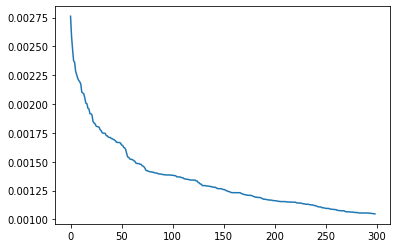

In [18]:
plt.plot(x[0:299], sortedImportance_List[0:299])
plt.show()

Now time to create a new table of only the most important features

In [19]:
finalMergeTable = pd.DataFrame()

numFeatures = 200
#number of iterations based on how many features may be changed based on how many create a good PCA plot
for i in range (numFeatures):
  targetColumn = newMergeTable.iloc[:,importance_indices[i]]
  finalMergeTable.insert(len(finalMergeTable.columns), i, targetColumn)

print(finalMergeTable)


                 0         1         2         3         4          5    \
GSM1304423  6.397743  6.300457  2.963805  4.208682  5.309973   3.724538   
GSM1304422  5.766274  4.600031  2.981914  4.319199  5.309166   4.408083   
GSM1304421  5.658255  6.128652  3.042333  4.104381  5.551086   3.596208   
GSM1304420  5.795419  6.193062  3.080156  4.340099  5.611132  10.727468   
GSM1134889  5.748788  6.109482  3.036607  4.158474  5.421793   6.339687   
...              ...       ...       ...       ...       ...        ...   
GSM1134768  6.129617  6.005498  3.054738  4.275306  5.504147   3.615881   
GSM1134767  6.065553  5.747978  3.110939  4.341086  5.685371    9.62805   
GSM1134766  6.544572  5.904952  3.137575  4.037233  5.567961   3.540796   
GSM1134765  5.952251  5.866017  3.066375  4.414769  5.867319   6.996107   
GSM1134764  6.291606  7.480805  3.022508  4.217434  5.524922   3.685755   

                 6         7         8         9    ...        190       191  \
GSM1304423  5.75904

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:3249: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  if (await self.run_code(code, result,  async_=asy)):


In [20]:
pca = decomposition.PCA(n_components=4)
pca.fit(finalMergeTable)



PCA(n_components=4)

In [21]:
scores = pca.transform(finalMergeTable)

In [22]:
scores_df = pd.DataFrame(scores, columns = ['PC1', 'PC2', 'PC3', 'PC4'])
scores_df

,PC1,PC2,PC3,PC4
0,-6.573169,-2.625883,3.021172,0.048805
1,1.153248,0.179893,-2.069129,-0.264988
2,-4.838342,-1.955379,-1.574729,1.608833
3,8.800319,-0.753580,0.640442,1.244041
4,1.419877,6.509357,-0.732843,-1.054082
...,...,...,...,...
125,-4.446175,1.027440,-0.175569,-0.540382
126,5.424534,-0.367900,-2.912427,-2.756943
127,-5.218151,-0.556570,-0.097186,-1.426747
128,2.435655,-0.158459,-1.704105,-1.858760


In [23]:
import plotly.express as px

In [24]:
# Label to color dict (manual)
label_color_dict_tissue = {'tumor':'red','normal':'green'}
label_color_dict_obesity = {'yes': 'red', 'no': 'green'}
label_color_dict_smoker = {'yes': 'red', 'no': 'green'}

# Color vector creation
cvec_tissue = [label_color_dict_tissue[label] for label in tissue_label]
cvec_obesity = [label_color_dict_obesity[label] for label in obesity_label]
cvec_smoker = [label_color_dict_smoker[label] for label in smoking_label]

shape_tissue = []
for i in cvec_tissue:
  if(i=='green'):
    shape_tissue.append('normal')
  else:
    shape_tissue.append('tumor')

new_shape_tissue=pd.DataFrame()
new_shape_tissue['marker'] = shape_tissue

In [25]:
print(cvec_tissue)
print(shape_tissue)
print(new_shape_tissue)

['green', 'red', 'green', 'red', 'green', 'red', 'green', 'red', 'green', 'red', 'green', 'red', 'green', 'red', 'green', 'red', 'green', 'red', 'green', 'red', 'green', 'red', 'green', 'red', 'green', 'red', 'green', 'red', 'green', 'red', 'green', 'red', 'green', 'red', 'green', 'red', 'green', 'red', 'green', 'red', 'red', 'green', 'red', 'green', 'red', 'green', 'red', 'green', 'red', 'green', 'red', 'green', 'red', 'green', 'red', 'green', 'red', 'green', 'red', 'green', 'red', 'green', 'red', 'green', 'red', 'green', 'red', 'green', 'red', 'green', 'red', 'green', 'red', 'green', 'red', 'green', 'red', 'green', 'red', 'green', 'red', 'green', 'red', 'green', 'red', 'green', 'red', 'green', 'red', 'green', 'red', 'green', 'red', 'green', 'red', 'green', 'red', 'green', 'red', 'green', 'red', 'green', 'red', 'green', 'red', 'green', 'red', 'green', 'red', 'green', 'red', 'green', 'red', 'green', 'red', 'green', 'red', 'green', 'red', 'red', 'green', 'red', 'green', 'red', 'red', 'r

In [26]:
#plt.figure(figsize=(8,8))
#for marker in shape_tissue:
#  plt.scatter(scores[:,0], scores[:,2],
#              c=cvec_tissue, edgecolor='', alpha=0.5, marker = marker)
#plt.xlabel('PC 1')
#plt.ylabel('PC 3')
#plt.show()

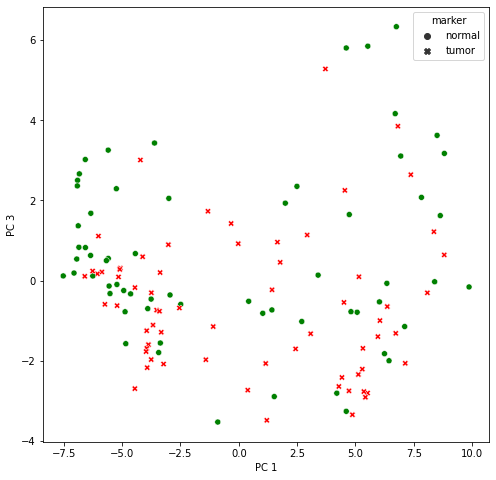

In [27]:
import seaborn as sns
plt.figure(figsize=(8,8))

sns.scatterplot(x=scores[:,0], y=scores[:,2], c=cvec_tissue, style=new_shape_tissue['marker'])
plt.xlabel('PC 1')
plt.ylabel('PC 3')
plt.show()

logsitic regression is sensitive to noise we chooose most important features so it can handle and make it more linearly separable

ensemble method (XGBoost):

https://www.nvidia.com/en-us/glossary/data-science/xgboost/
https://en.wikipedia.org/wiki/Gradient_boosting
multi perceptron data good at handling non-linear data but requires more training data

EXPLAIN EVERYTHING in simple but detailed way

Target Word Count: --> five pages (maybe even 10 pages)

SPLIT INTO TRAIN VALID AND TEST if test too small then use cross-validation https://scikit-learn.org/stable/modules/cross_validation.html

Standardizing - is it needed??

In [28]:
#from sklearn.preprocessing import StandardScaler

#sc = StandardScaler()

#finalMergeTable['Smoker'] = smokingList
#finalMergeTable['Obesity'] = obesityList

#final_normalized = sc.fit_transform(finalMergeTable)

3D PCA Plot

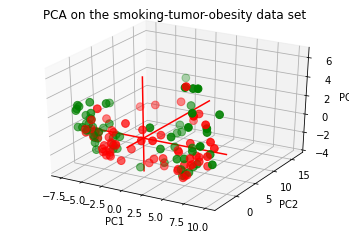

In [29]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(scores[:,0], scores[:,1], scores[:,2], c=cvec_tissue, cmap="Set2_r", s=60)

xAxisLine = ((min(scores[:,0]), max(scores[:,0])), (0, 0), (0,0))
ax.plot(xAxisLine[0], xAxisLine[1], xAxisLine[2], 'r')
yAxisLine = ((0, 0), (min(scores[:,1]), max(scores[:,1])), (0,0))
ax.plot(yAxisLine[0], yAxisLine[1], yAxisLine[2], 'r')
zAxisLine = ((0, 0), (0,0), (min(scores[:,2]), max(scores[:,2])))
ax.plot(zAxisLine[0], zAxisLine[1], zAxisLine[2], 'r')
 
# label the axes
ax.set_xlabel("PC1")
ax.set_ylabel("PC2")
ax.set_zlabel("PC3")
ax.set_title("PCA on the smoking-tumor-obesity data set")
plt.show()

In [30]:
finalMergeTable['Tissue'] = tissueList
finalMergeTable

,0,1,2,3,4,5,6,7,8,9,...,191,192,193,194,195,196,197,198,199,Tissue
GSM1304423,6.397743,6.300457,2.963805,4.208682,5.309973,3.724538,5.759047,5.596107,4.463671,3.641529,...,3.93797,4.591282,4.448996,4.448996,5.014183,4.683847,4.394806,5.306166,9.238512,0
GSM1304422,5.766274,4.600031,2.981914,4.319199,5.309166,4.408083,5.997673,6.085793,4.394123,3.697118,...,3.808824,5.189384,4.335945,4.335945,4.904021,4.650814,5.893896,5.167701,9.048478,1
GSM1304421,5.658255,6.128652,3.042333,4.104381,5.551086,3.596208,5.153236,6.047226,4.639824,3.70699,...,3.780621,4.272666,4.459294,4.459294,5.237963,4.474198,3.646604,4.428306,9.243933,0
GSM1304420,5.795419,6.193062,3.080156,4.340099,5.611132,10.727468,5.580845,5.839192,4.349109,3.473854,...,3.814149,5.38975,4.702067,4.702067,4.978065,4.530422,5.984054,5.219562,8.491306,1
GSM1134889,5.748788,6.109482,3.036607,4.158474,5.421793,6.339687,5.088394,5.260285,4.539935,4.192513,...,4.656096,5.024302,4.336491,4.336491,5.149145,5.176748,4.183584,5.314021,7.77501,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
GSM1134768,6.129617,6.005498,3.054738,4.275306,5.504147,3.615881,5.231934,5.777534,4.30984,3.548879,...,4.087209,4.548417,3.943586,3.943586,4.978929,4.738777,3.706167,4.992061,8.780186,1
GSM1134767,6.065553,5.747978,3.110939,4.341086,5.685371,9.62805,5.974013,5.77396,4.149678,3.607968,...,3.983043,4.52304,4.605908,4.605908,5.242858,4.411799,6.153735,5.111378,8.996233,1
GSM1134766,6.544572,5.904952,3.137575,4.037233,5.567961,3.540796,5.298135,5.558158,4.088838,3.405888,...,4.12765,4.555936,4.420108,4.420108,4.940636,4.550381,3.825036,4.919384,8.963369,0
GSM1134765,5.952251,5.866017,3.066375,4.414769,5.867319,6.996107,5.712525,5.585894,4.149157,3.63086,...,4.035047,4.918262,4.263134,4.263134,5.668121,4.611747,3.754903,5.952647,8.231002,1


In [31]:
for i in range(numFeatures):
  finalMergeTable.iloc[:, i] = finalMergeTable.iloc[:, i].astype(float, errors = 'raise')
finalMergeTable['Tissue'] = finalMergeTable['Tissue'].astype(float, errors = 'raise')

finalMergeTable.dtypes

0         float64
1         float64
2         float64
3         float64
4         float64
           ...   
196       float64
197       float64
198       float64
199       float64
Tissue    float64
Length: 201, dtype: object

In [32]:
finalMergeTable

,0,1,2,3,4,5,6,7,8,9,...,191,192,193,194,195,196,197,198,199,Tissue
GSM1304423,6.397743,6.300457,2.963805,4.208682,5.309973,3.724538,5.759047,5.596107,4.463671,3.641529,...,3.937970,4.591282,4.448996,4.448996,5.014183,4.683847,4.394806,5.306166,9.238512,0.0
GSM1304422,5.766274,4.600031,2.981914,4.319199,5.309166,4.408083,5.997673,6.085793,4.394123,3.697118,...,3.808824,5.189384,4.335945,4.335945,4.904021,4.650814,5.893896,5.167701,9.048478,1.0
GSM1304421,5.658255,6.128652,3.042333,4.104381,5.551086,3.596208,5.153236,6.047226,4.639824,3.706990,...,3.780621,4.272666,4.459294,4.459294,5.237963,4.474198,3.646604,4.428306,9.243933,0.0
GSM1304420,5.795419,6.193062,3.080156,4.340099,5.611132,10.727468,5.580845,5.839192,4.349109,3.473854,...,3.814149,5.389750,4.702067,4.702067,4.978065,4.530422,5.984054,5.219562,8.491306,1.0
GSM1134889,5.748788,6.109482,3.036607,4.158474,5.421793,6.339687,5.088394,5.260285,4.539935,4.192513,...,4.656096,5.024302,4.336491,4.336491,5.149145,5.176748,4.183584,5.314021,7.775010,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
GSM1134768,6.129617,6.005498,3.054738,4.275306,5.504147,3.615881,5.231934,5.777534,4.309840,3.548879,...,4.087209,4.548417,3.943586,3.943586,4.978929,4.738777,3.706167,4.992061,8.780186,1.0
GSM1134767,6.065553,5.747978,3.110939,4.341086,5.685371,9.628050,5.974013,5.773960,4.149678,3.607968,...,3.983043,4.523040,4.605908,4.605908,5.242858,4.411799,6.153735,5.111378,8.996233,1.0
GSM1134766,6.544572,5.904952,3.137575,4.037233,5.567961,3.540796,5.298135,5.558158,4.088838,3.405888,...,4.127650,4.555936,4.420108,4.420108,4.940636,4.550381,3.825036,4.919384,8.963369,0.0
GSM1134765,5.952251,5.866017,3.066375,4.414769,5.867319,6.996107,5.712525,5.585894,4.149157,3.630860,...,4.035047,4.918262,4.263134,4.263134,5.668121,4.611747,3.754903,5.952647,8.231002,1.0


In [33]:
y = finalMergeTable.loc[:, 'Tissue']
print(y)

GSM1304423    0.0
GSM1304422    1.0
GSM1304421    0.0
GSM1304420    1.0
GSM1134889    0.0
             ... 
GSM1134768    1.0
GSM1134767    1.0
GSM1134766    0.0
GSM1134765    1.0
GSM1134764    0.0
Name: Tissue, Length: 130, dtype: float64


In [34]:
# For Multi Outputs
from keras.utils import np_utils
from sklearn.preprocessing import LabelEncoder


# label encoder y
encoder = LabelEncoder()
encoder.fit(y)
y = encoder.transform(y)
y = np_utils.to_categorical(y)

In [35]:
# Data Standardization with Standard Scaler
from sklearn.preprocessing import StandardScaler
Scaler=StandardScaler()
finalMergeTable=Scaler.fit_transform(finalMergeTable)

finalMergeTable[0:3]

finalMergeTable.shape

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,


(130, 201)

In [36]:
# Import MLPClassifer 
from sklearn.neural_network import MLPClassifier
from sklearn. model_selection import train_test_split

#first_n_column  = df.iloc[: , :N]

#var_colums = [c for c in finalMergeTable.columns if c not in ['Tissue']]
X = finalMergeTable[:, :numFeatures]

y.shape
print(X)
print(y)


X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.2)

[[ 1.7086089   0.6928543  -0.86817543 ...  0.13444081 -0.32764857
   1.17282614]
 [-0.91887673 -2.48634595 -0.64418403 ...  2.25283913 -0.52673826
   0.78068251]
 [-1.36833539  0.3716388   0.10313826 ... -0.92286167 -1.58986235
   1.18401277]
 ...
 [ 2.31954884 -0.04660134  1.28119447 ... -0.67071524 -0.88377588
   0.6050562 ]
 [-0.14504327 -0.11939577  0.40051525 ... -0.76982202  0.60188033
  -0.90621639]
 [ 1.26698044  2.89969141 -0.14207246 ... -0.58692702 -0.48927569
   0.87955633]]
[[1. 0.]
 [0. 1.]
 [1. 0.]
 [0. 1.]
 [1. 0.]
 [0. 1.]
 [1. 0.]
 [0. 1.]
 [1. 0.]
 [0. 1.]
 [1. 0.]
 [0. 1.]
 [1. 0.]
 [0. 1.]
 [1. 0.]
 [0. 1.]
 [1. 0.]
 [0. 1.]
 [1. 0.]
 [0. 1.]
 [1. 0.]
 [0. 1.]
 [1. 0.]
 [0. 1.]
 [1. 0.]
 [0. 1.]
 [1. 0.]
 [0. 1.]
 [1. 0.]
 [0. 1.]
 [1. 0.]
 [0. 1.]
 [1. 0.]
 [0. 1.]
 [1. 0.]
 [0. 1.]
 [1. 0.]
 [0. 1.]
 [1. 0.]
 [0. 1.]
 [0. 1.]
 [1. 0.]
 [0. 1.]
 [1. 0.]
 [0. 1.]
 [1. 0.]
 [0. 1.]
 [1. 0.]
 [0. 1.]
 [1. 0.]
 [0. 1.]
 [1. 0.]
 [0. 1.]
 [1. 0.]
 [0. 1.]
 [1. 0.]
 [0.

In [37]:
##NEW MODEL
# Multi Layer Perceptron Artificial Neural Network
from sklearn.neural_network import MLPClassifier 

# Setting up a primitive (non-validated) model
mlpc = MLPClassifier(random_state = 0)# ANN model object created

mlpc.fit(X_train, y_train) # ANN model object fit

MLPClassifier(random_state=0)

In [38]:
# Forecasting on the Unvalidated Model
y_pred = mlpc.predict(X_valid) # model prediction process over test set

In [39]:
import sklearn.metrics as metrics

# Accuracy

print("Accuracy:",metrics.accuracy_score(y_valid,y_pred))

# f1 score

print("f1_weighted:",metrics.f1_score(y_valid, y_pred,average='weighted'))

Accuracy: 0.8076923076923077
f1_weighted: 0.8687782805429864


In [40]:
# Cross Validation Process
# Parameters for CV created in dictionary structure
# INFORMATION ABOUT THE INPUTED PARAMETERS
# alpha: float, default = 0.0001 L2 penalty (regularization term) parameter. (penalty parameter)
   
mlpc_params = {"alpha": [0.1, 0.01, 0.0001],
              "hidden_layer_sizes": [(10,10,10),
                                     (100,100,100),
                                     (100,100)],
              "solver" : ["lbfgs","adam","sgd"],
              "activation": ["relu","logistic"]}

from sklearn.model_selection import GridSearchCV




mlpc = MLPClassifier(random_state = 0) # ANN model object created

# Model CV process 
mlpc_cv_model = GridSearchCV(mlpc, mlpc_params, 
                         cv = 5, # To make a 5-fold CV
                         n_jobs = -1, # Number of jobs to be run in parallel (-1: means to use all processors)
                         verbose = 2) # Controls the level of detail: higher means more messages gets value as integer.

mlpc_cv_model.fit(X_train, y_train) 


# The best parameter obtained as a result of CV process

print("The best parameters: " + str(mlpc_cv_model.best_params_))

Fitting 5 folds for each of 54 candidates, totalling 270 fits
The best parameters: {'activation': 'relu', 'alpha': 0.1, 'hidden_layer_sizes': (100, 100, 100), 'solver': 'lbfgs'}


In [41]:
# Model Tuning
# Setting the Final Model with the best parameter

mlpc_tuned = mlpc_cv_model.best_estimator_

# Fitting Final Model
mlpc_tuned.fit(X_train, y_train)

MLPClassifier(alpha=0.1, hidden_layer_sizes=(100, 100, 100), random_state=0,
              solver='lbfgs')

In [42]:
# K-fold f1_weighted

from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

# K fold
kf = KFold(shuffle=True, n_splits=5) # To make a 5-fold CV

cv_results_kfold = cross_val_score(mlpc_tuned, X_valid, np.argmax(y_valid, axis=1), cv=kf, scoring= 'f1_weighted')

print("K-fold Cross Validation f1_weigted Results: ",cv_results_kfold)
print("K-fold Cross Validation f1_weigted Results Mean: ",cv_results_kfold.mean())

K-fold Cross Validation f1_weigted Results:  [0.82857143 0.88888889 0.78095238 0.71111111 0.78095238]
K-fold Cross Validation f1_weigted Results Mean:  0.7980952380952381


In [43]:
# K-fold accuracy

from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

# K fold
kf = KFold(shuffle=True, n_splits=5) # To make a 5-fold CV

cv_results_kfold = cross_val_score(mlpc_tuned, X_valid, np.argmax(y_valid, axis=1), cv=kf, scoring= 'accuracy')

print("K-fold Cross Validation accuracy Results: ",cv_results_kfold)
print("K-fold Cross Validation accuracy Results Mean: ",cv_results_kfold.mean())

K-fold Cross Validation accuracy Results:  [0.66666667 0.6        0.4        1.         0.8       ]
K-fold Cross Validation accuracy Results Mean:  0.6933333333333334


In [44]:
# Tune Model Prediction
# Prediction process of Final Model over test set
y_pred = mlpc_tuned.predict(X_valid)

In [45]:
# Accuracy and f1_weighted value of Final Model

# %% f1 score
import sklearn.metrics as metrics
print("f1_weighted:",metrics.f1_score(np.argmax(y_valid, axis=1), np.argmax(y_pred, axis=1),average='weighted'))

# %% Accuracy

print("accuracy:",metrics.accuracy_score(np.argmax(y_valid, axis=1), np.argmax(y_pred, axis=1)))

f1_weighted: 0.75882012724118
accuracy: 0.7692307692307693


In [46]:
#%% Confusion Matrix and Classification Report
from sklearn.metrics import confusion_matrix, classification_report 

# Classification Report
model_report = classification_report(np.argmax(y_valid, axis=1), np.argmax(y_pred, axis=1))
print(model_report)

              precision    recall  f1-score   support

           0       0.67      0.50      0.57         8
           1       0.80      0.89      0.84        18

    accuracy                           0.77        26
   macro avg       0.73      0.69      0.71        26
weighted avg       0.76      0.77      0.76        26



In [55]:
#%% ROC-AUC Curve

from scipy import interp
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc
# Learn to predict each class against the other


n_classes = 2 # number of class




# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_valid[:, i], y_pred[:, i], )
    roc_auc[i] = auc(fpr[i], tpr[i])

# Compute micro-average ROC curve and ROC area
fpr["micro"], tpr["micro"], _ = roc_curve(y_valid.ravel(), y_pred.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead
  # This is added back by InteractiveShellApp.init_path()


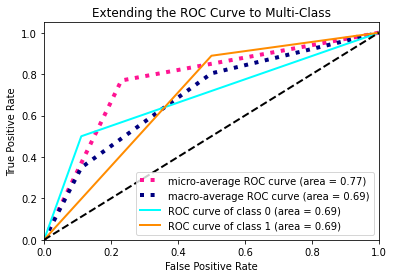

In [58]:
# Process of plotting roc-auc curve belonging to all classes.

from itertools import cycle
roc_auc_scores = []
# First aggregate all false positive rates
all_fpr = np.unique(np.concatenate([fpr[i] for i in range(n_classes)]))

# Then interpolate all ROC curves at this points
mean_tpr = np.zeros_like(all_fpr)
for i in range(n_classes):
    mean_tpr += interp(all_fpr, fpr[i], tpr[i])

# Finally average it and compute AUC
mean_tpr /= n_classes

fpr["macro"] = all_fpr
tpr["macro"] = mean_tpr
roc_auc["macro"] = auc(fpr["macro"], tpr["macro"])

# Plot all ROC curves
plt.figure()
plt.plot(fpr["micro"], tpr["micro"],
         label='micro-average ROC curve (area = {0:0.2f})'
               ''.format(roc_auc["micro"]),
         color='deeppink', linestyle=':', linewidth=4)

plt.plot(fpr["macro"], tpr["macro"],
         label='macro-average ROC curve (area = {0:0.2f})'
               ''.format(roc_auc["macro"]),
         color='navy', linestyle=':', linewidth=4)

colors = cycle(['aqua', 'darkorange', 'cornflowerblue'])
for i, color in zip(range(n_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=2,
             label='ROC curve of class {0} (area = {1:0.2f})'
             ''.format(i, roc_auc[i]))
    roc_auc_scores.append(roc_auc[i])

plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Extending the ROC Curve to Multi-Class')
plt.legend(loc="lower right")
plt.show()

KAGGLE CODE FINISHED

In [ ]:
# Create model object
#clf = MLPClassifier(hidden_layer_sizes=(6,5), 
#                    max_iter = 300,
#                    random_state=5,
#                    verbose=True,
#                    early_stopping = False,
#                    learning_rate_init=0.01)

# Fit data onto the model
#clf.fit(X_train,y_train)

In [ ]:
# Make prediction on test dataset
ypred=clf.predict(X_valid)

# Import accuracy score 
from sklearn.metrics import accuracy_score

# Calcuate accuracy
accuracy_score(y_valid,ypred)

In [ ]:
from sklearn.model_selection import cross_validate 


clf = MLPClassifier(hidden_layer_sizes=(6,5), 
                    max_iter = 300,
                    random_state=5,
                    verbose=True,
                    early_stopping = False,
                    learning_rate_init=0.01)

cv_results = cross_validate(clf, X, y, cv=10, 
                            return_train_score=False, 
                            scoring=clf.score) 
print("Fit scores: {}".format(cv_results['test_score']))


In [ ]:
import sklearn.metrics as metrics

# Accuracy

print("Accuracy:",metrics.accuracy_score(y_valid,y_train))

# f1 score

print("f1_weighted:",metrics.f1_score(y_valid, y_train,average='weighted'))

In [ ]:
import matplotlib.pyplot as plt

plt.plot(iteration, loss)

plt.show()

In [ ]:
from sklearn.metrics import accuracy_score
accuracy_score(y_valid,cv_results)

In [ ]:

y.shape

In [ ]:
X.shape


In [ ]:
from keras.initializers import VarianceScaling
from keras.regularizers import l2
from keras.models import Sequential
from keras.layers import Dense
from sklearn.model_selection import StratifiedKFold
import numpy as np

kfold = StratifiedKFold(n_splits = 10, shuffle = True, random_state=7)
cvscores = []

for train, test in kfold.split(X, y):
  model = Sequential()
  model.add(Dense(38, input_dim=X.shape[0],
                  kernel_regularizer=l2(0.001),
                  kernel_initializer=VarianceScaling(),
                  activation='relu'))

  model.add(Dense(25, 
                  kernel_regularizer=l2(0.01),
                  kernel_initializer=VarianceScaling(),
                  activation='relu'))
  model.add(Dense(y.shape[0], activation='sigmoid'))

  model.compile(loss='binary_crossentropy', optimizer='adam',
                metrics=['acc'])
  
  model.fit(X[train], y[train], epochs=50, batch_size=25, verbose=0,
            validation_data=(X[test], y[test]))
  
  scores = model.evaluate(X[test], y[test], verbose=0)
  print("%s: %.2f%%" % (model.metrics_names[1], scores[1] * 100))
  cvscores.append(scores[1] * 100) 

print("%.2f%% (+/- %.2f%%)" % (np.mean(cvscores), np.std(cvscores)))